<a href="https://colab.research.google.com/github/ShreyaRoy-c566/LGMVIP_DS_Internship/blob/main/Exploratory_Data_Analysis_on_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis on Dataset - Terrorism 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import matplotlib as mpl

In [ ]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Explo

In [ ]:
df.shape

(69503, 135)

In [ ]:
print([col for col in df.columns])

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#analyse all columns
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,6.950300e+04,69503.000000,69503.000000,69503.000000,69503.000000,69503.000000,69502.000000,65790.000000,6.578900e+04,69502.000000,69502.000000,69502.000000,69502.000000,69502.000000,69502.000000,11060.000000,69502.000000,69502.000000,69502.000000,69502.000000,206.000000,13.000000,69502.000000,66093.000000,69061.000000,920.000000,717.000000,837.000000,184.000000,150.000000,180.000000,69461.000000,198.000000,15.000000,69502.000000,9966.000000,2932.000000,3382.000000,594.000000,74.000000,28.000000,11.0,11.000000,326.000000,69502.000000,57682.00000,3620.000000,3024.000000,448.000000,391.000000,68.000000,64.00000,63367.000000,5401.000000,5110.000000,61191.000000,5341.000000,4692.000000,69502.000000,18281.000000,1.013200e+04,69327.000000,4415.000000,4413.000000,1484.000000,1336.000000,67374.000000,7.090000e+02,34.000000,1.980000e+02,39.000000,1847.000000,1484.000000,69502.000000,69502.000000,69502.000000,69502.000000
mean,1.987259e+11,1987.192668,6.449276,15.378919,0.021596,146.329022,5.754597,18.483214,-1.322065e+03,1.440275,0.041639,0.987008,0.989166,0.873701,-1.625881,1.248825,0.107378,0.916089,0.002115,3.094213,3.669903,5.615385,7.928865,45.559863,127.928744,9.394565,49.741980,162.856631,9.396739,56.266667,131.633333,0.048617,0.212121,0.066667,0.001827,52.359823,-32.728513,-0.020106,5.173401,0.000000,4.678571,1.0,7.090909,-6.717791,6.538502,10.10251,6.544475,10.325728,6.647321,10.508951,6.323529,10.75000,2.205912,0.243288,0.568297,2.199098,0.527242,0.058610,0.692441,3.368962,7.011180e+05,0.062645,2.794790,-0.043055,10.295148,17.239521,0.010464,3.366061e+06,14097.264706,1.040590e+06,2935.384615,3.344342,0.634771,-3.729993,-3.689002,0.126342,-2.942994
std,6.684844e+08,6.684525,3.386507,8.805010,0.145362,134.275639,3.207680,24.267536,3.360157e+05,1.115814,0.202980,0.113242,0.103523,0.332188,3.685118,0.565074,0.309596,0.277257,0.045941,1.991475,2.092441,1.609268,6.819112,33.058673,78.585453,6.621574,30.407228,137.531131,6.155560,30.373219,100.849238,0.215068,0.409847,0.258199,0.042708,685.022765,47.027331,1.386613,3.453165,1.923182,3.752072,0.0,3.505839,3.979964,2.324833,7.06738,1.858777,7.435602,2.101601,7.865817,1.530205,7.84978,10.091659,4.962047,5.463874,30.403519,13.898625,0.835281,0.772188,0.520811,3.019497e+07,0.262883,329.906527,5.163988,103.933038,122.492184,0.114133,3.838159e+07,69028.573564,4.190744e+06,10589.759576,1.686573,41.819975,4.496500,4.551104,0.806457,4.509628
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,1.0,1.000000,-9.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,5.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.982110e+11,1982.000000,4.000000,8.000000,0.000000,61.000000,3.000000,6.053240,-7.556

In [ ]:
df[["attacktype1_txt", "attacktype1"]].drop_duplicates()

,attacktype1_txt,attacktype1
0,Assassination,1.0
1,Hostage Taking (Kidnapping),6.0
3,Bombing/Explosion,3.0
4,Facility/Infrastructure Attack,7.0
5,Armed Assault,2.0
12,Hijacking,4.0
16,Unknown,9.0
298,Unarmed Assault,8.0
336,Hostage Taking (Barricade Incident),5.0
69502,NaN,NaN


In [ ]:
df["attacktype1_txt"].value_counts()

Bombing/Explosion                      29201
Armed Assault                          16178
Assassination                          12347
Facility/Infrastructure Attack          4647
Hostage Taking (Kidnapping)             3110
Unknown                                 2663
Hostage Taking (Barricade Incident)      628
Unarmed Assault                          385
Hijacking                                343
Name: attacktype1_txt, dtype: int64

In [ ]:
df[["region", "region_txt"]].drop_duplicates()

,region,region_txt
0,2.0,Central America & Caribbean
1,1.0,North America
2,5.0,Southeast Asia
3,8.0,Western Europe
4,4.0,East Asia
6,3.0,South America
15,9.0,Eastern Europe
16,11.0,Sub-Saharan Africa
95,10.0,Middle East & North Africa
565,12.0,Australasia & Oceania


In [ ]:
df["region_txt"].value_counts()

South America                  16437
Western Europe                 13383
Central America & Caribbean    10252
Middle East & North Africa      9335
South Asia                      7702
Sub-Saharan Africa              4471
Southeast Asia                  2900
North America                   2789
Eastern Europe                  1094
East Asia                        603
Central Asia                     329
Australasia & Oceania            207
Name: region_txt, dtype: int64

In [ ]:
#priors will be all kills by Armed Assaults in Western Europe and North America.  
d_west = df["nkill"][((df['region'] == 1) | (df['region']== 8))]
d_west = [k for k in d_west if k > 0]
d_west = [k for k in d_west if k < 100]
d_west
prior_mean = np.mean(d_west)
prior_std = np.std(d_west)

print(prior_mean, prior_std)

1.595824949698189 3.0454922115158447


In [ ]:
# Cheacking null values
df.isnull().sum() 

eventid           0
iyear             0
imonth            0
iday              0
approxdate    69448
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       62041
Length: 135, dtype: int64

In [ ]:
df.nunique()

eventid       69503
iyear            29
imonth           13
iday             32
approxdate       48
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related        6195
Length: 135, dtype: int64

In [ ]:
#converting data to understable format
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'state'
                    ,'city':'City','latitude':'Latitude','longitude':'Longitude','location':'Location','summary':'Summary'
                    ,'attacktype1_txt':'Attack Type','targtype1_txt':'Target Type','targtsubtype1_txt':'Target Sub Type','gname':'Group Name','natlty1_txt':'Nationality','motive':'Motive'
                    ,'weaptype1_txt':'Weapon Type','weapsubtype1_txt':'Weapon Subtype','nkill':'Killed','nwound':'Wounded','addnotes':'Add Notes'} ,inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,City,Latitude,Longitude,specificity,vicinity,Location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attack Type,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target Type,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,Nationality,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group Name,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon Type,weapsubtype1,Weapon Subtype,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,Add Notes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Explosives,16.0,Unknow

In [ ]:
#checking which year,counrty maximum people wounded
print(df['Wounded'].max())
print(df.loc[df['Wounded'] == df['Wounded'].max(), 'Year'])
print(df.loc[df['Wounded'] == df['Wounded'].max(), 'Country'])

5500.0
58841    1995
Name: Year, dtype: int64
58841    Japan
Name: Country, dtype: object


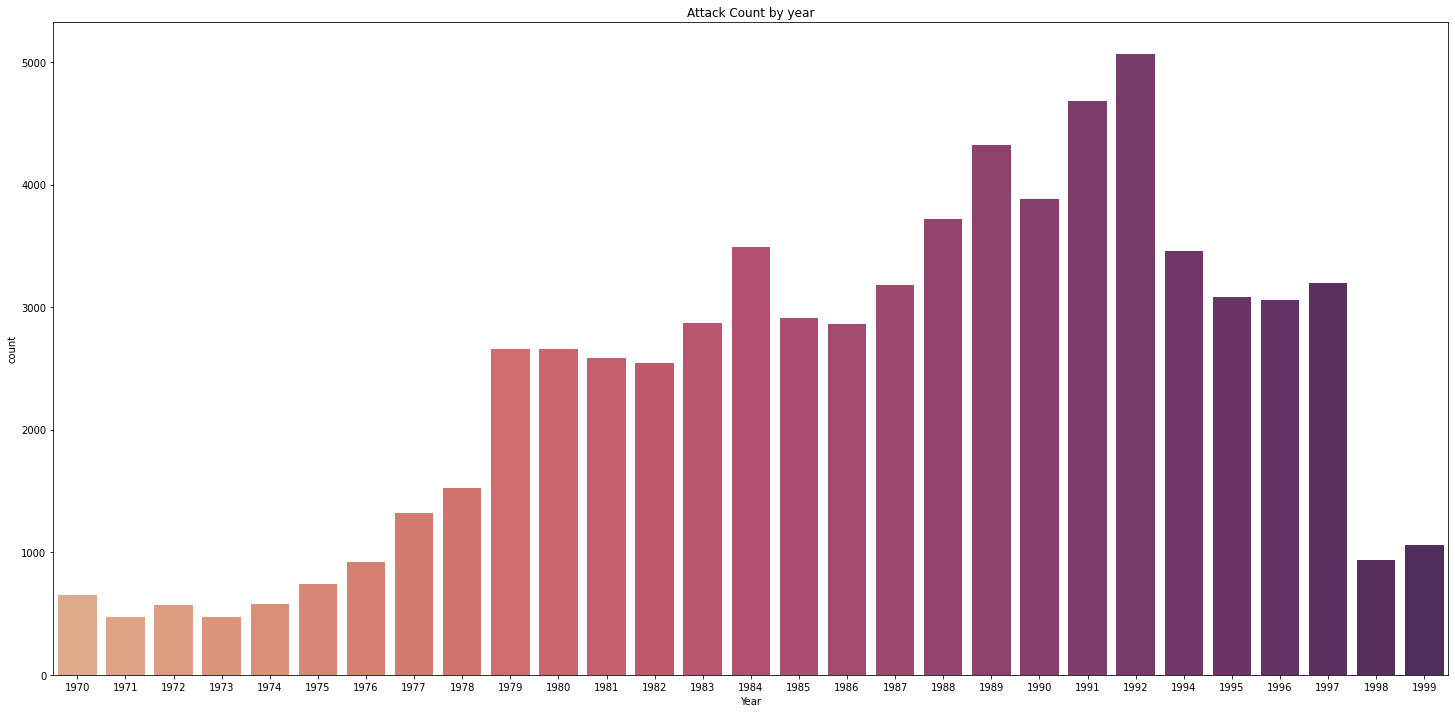

In [ ]:
plt.figure(figsize=(25,12)) 
plt.title("Attack Count by year")
sns.countplot(x ='Year', data = df, palette='flare')

In [ ]:
df1= df[['Year','Month','Day','Country','Region','City','state','Latitude','Longitude','Attack Type','Target Type','Group Name','Motive','Weapon Type','Killed','Wounded','Summary']]

In [ ]:
df1

,Year,Month,Day,Country,Region,City,state,Latitude,Longitude,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,Attica,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69498,1999,10,4,Angola,Sub-Saharan Africa,Unknown,Uige,-7.616114,15.050341,Armed Assault,Private Citizens & Property,National Union for the Total Independence of Angola (UNITA),Unknown,Incendiary,36.0,NaN,"10/04/1999: National Union for the Total Independence of Angola (UNITA) members killed and burned thirty-six civilians in Uige Province, Angola. The attackers also burned countless homes and abducted 56 people, whom they were reported to have whisked to one of their bases in the region. The fate of the kidnapped was unknown."
69499,1999,10,4,Colombia,South America,Ocana,Norte de Santander,8.233420,-73.353310,Armed Assault,Educational Institution,Popular Liberation Army (EPL),"Pamphlets were found at the scene of the kidnapping, which stated that ""The EPL has not died.""",Unknown,1.0,2.0,"10/04/1999: Fifteen perpetrators from the Popular Liberation Army (Ejircito Popular de Liberaciyn - EPL) intercepted several buses that were carrying schoolchildren, university students and workers in the Juan XIII area of Ocana, Norte de Santander Department, Colombia. Forty to fifty civilians were kidnapped, but all were released after a firefight with Colombian troops, in which one perpetrator died and two hostages were injured."
69500,1999,10,4,Spain,Western Europe,Basauri,Basque Country,43.222177,-2.885668,Facility/Infrastructure Attack,Government (General),Unknown,Unknown,Incendiary,0.0,0.0,"10/04/1999: The private car of a member of Spain's governing Popular Party (PP) living in Basauri, Biscay Province, Spain, was destroyed by fire after being attacked by unknown perpetrators."
69501,1999,10,4,Spain,Western Europe,Donostia-San Sebastian,Basque Country,43.291618,-1.977903,Facility/Infrastructure Attack,Government (General),Unknown,Unknown,Incendiary,0.0,0.0,"10/04/1999: The Herri Batasuna (HB) social center in the Intxaurrondo district of San Sebastian, Gipuzkoa Province, Spain, was slightly damaged after unknown perpetrators dowsed the entrance door with inflammable liquid. No one was injured in the attack. HB is the political wing of Euskadi ta Askatasuna (ETA)"


In [ ]:
df1['Latitude'].dropna()

0        18.456792
1        19.371887
2        15.478598
3        37.997490
4        33.580412
           ...    
69497    37.997490
69498    -7.616114
69499     8.233420
69500    43.222177
69501    43.291618
Name: Latitude, Length: 65790, dtype: float64

In [ ]:
df1['Longitude'].dropna()

0        -69.951164
1        -99.086624
2        120.599741
3         23.762728
4        130.396361
            ...    
69497     23.762728
69498     15.050341
69499    -73.353310
69500     -2.885668
69501     -1.977903
Name: Longitude, Length: 65789, dtype: float64

Most active organizations:
 Unknown                                             24205
Shining Path (SL)                                    4501
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2656
Basque Fatherland and Freedom (ETA)                  1787
Name: Group Name, dtype: int64


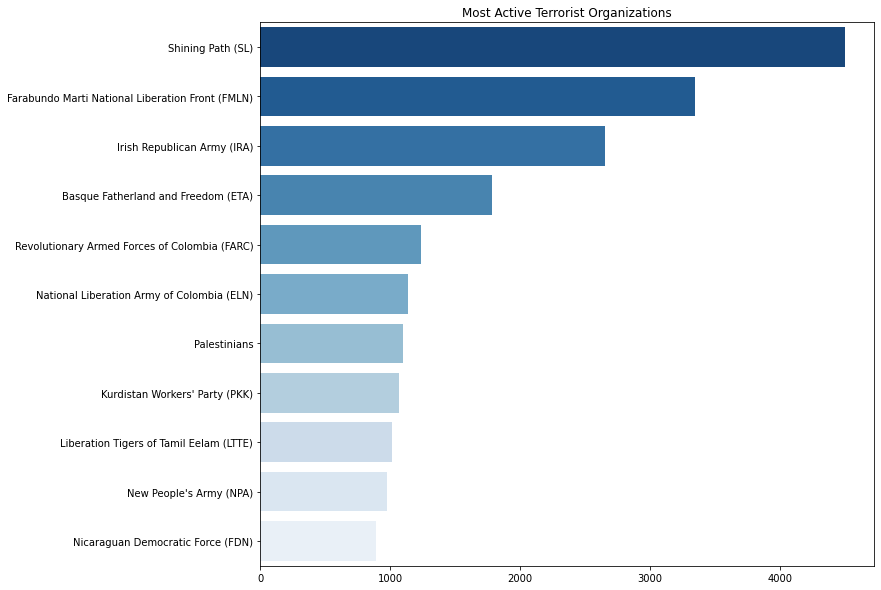

In [ ]:
print('Most active organizations:\n',df1['Group Name'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df1['Group Name'].value_counts()[1:12].index,x=df1['Group Name'].value_counts()[1:12].values,palette='Blues_r')
plt.title('Most Active Terrorist Organizations')
plt.show()

Most Popular Attack Type:
 Bombing/Explosion                 29201
Armed Assault                     16178
Assassination                     12347
Facility/Infrastructure Attack     4647
Hostage Taking (Kidnapping)        3110
Name: Attack Type, dtype: int64


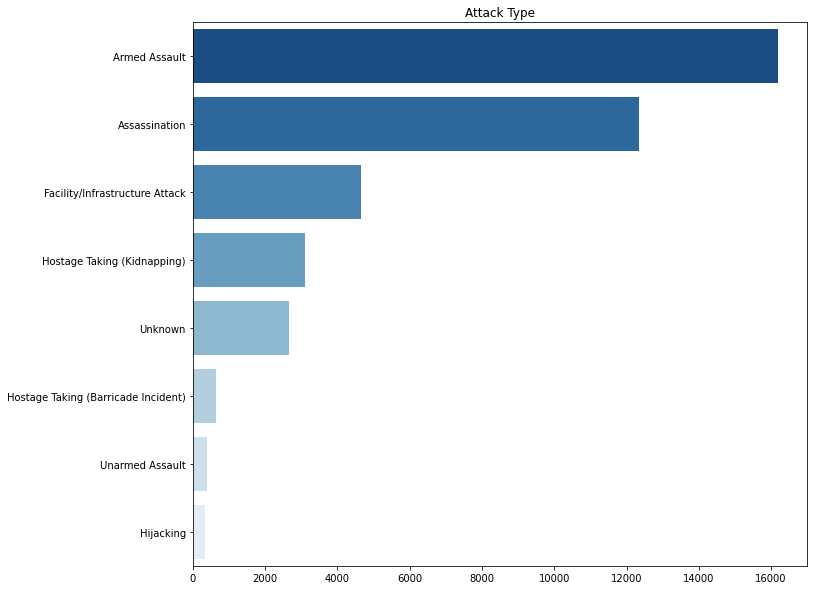

In [ ]:
print('Most Popular Attack Type:\n',df1['Attack Type'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df1['Attack Type'].value_counts()[1:12].index,x=df1['Attack Type'].value_counts()[1:12].values,palette='Blues_r')
plt.title('Attack Type')
plt.show()

In [ ]:
#country wise attacks
ct=df1["Country"].value_counts().head(10)
ct

Colombia          6173
Peru              6023
El Salvador       5320
United Kingdom    4166
India             3019
Spain             2814
Turkey            2470
United States     2343
Chile             2267
France            2229
Name: Country, dtype: int64

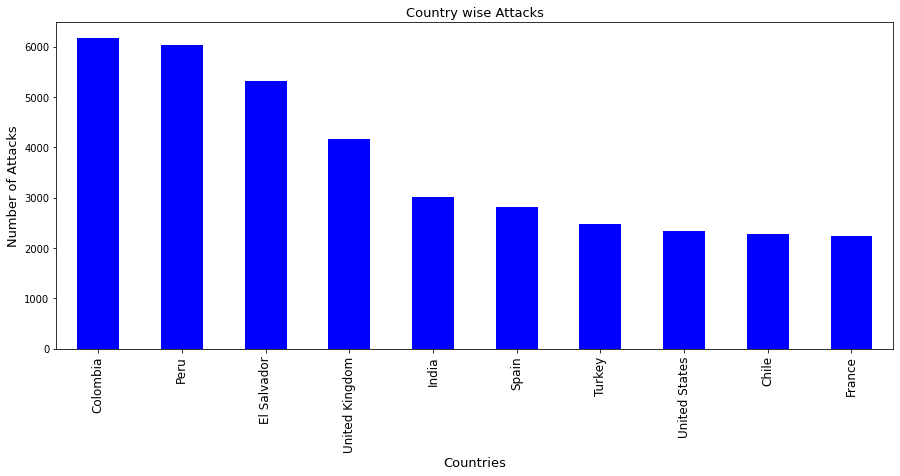

In [ ]:
ct.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
#city wise attacks
city=df1["City"].value_counts()[1:11]
city

Lima              2351
Belfast           1851
San Salvador      1558
Santiago          1555
Karachi           1122
Bogota             856
Beirut             855
Istanbul           825
Medellin           798
Guatemala City     749
Name: City, dtype: int64

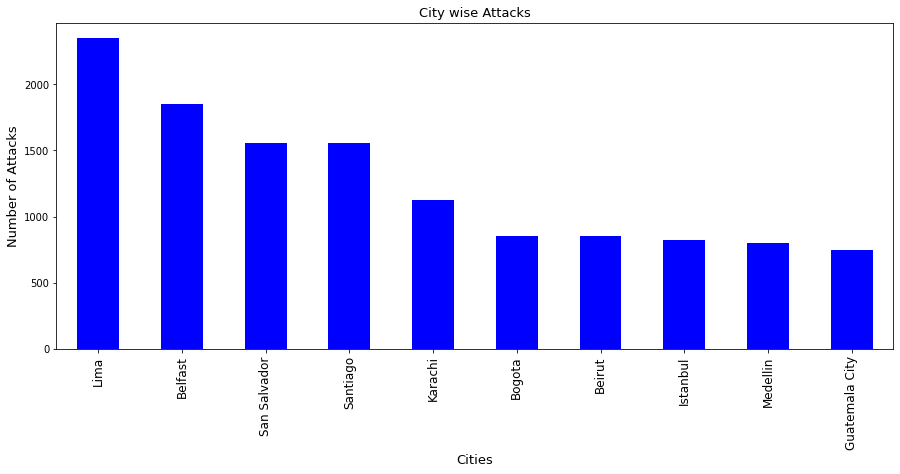

In [ ]:
city.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
#attacks by a particular group
gca=df1[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Group Name                                        Country       
Shining Path (SL)                                 Peru              4487
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Irish Republican Army (IRA)                       United Kingdom    2561
Basque Fatherland and Freedom (ETA)               Spain             1744
Revolutionary Armed Forces of Colombia (FARC)     Colombia          1222
National Liberation Army of Colombia (ELN)        Colombia          1108
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka         1012
New People's Army (NPA)                           Philippines        975
Kurdistan Workers' Party (PKK)                    Turkey             905
Nicaraguan Democratic Force (FDN)                 Nicaragua          886
dtype: int64

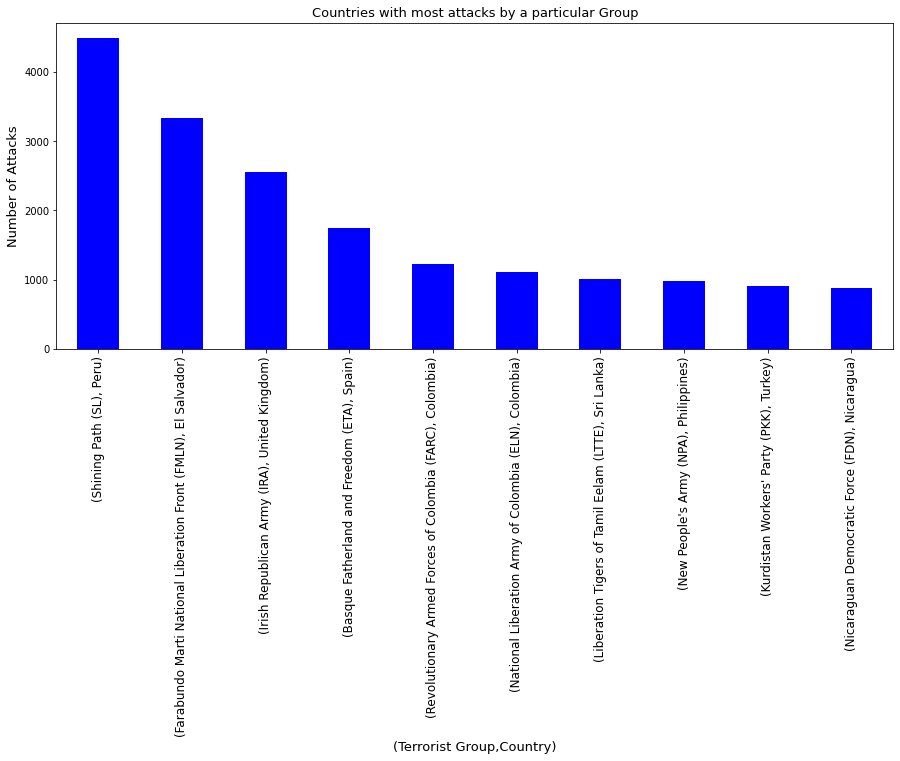

In [ ]:
gca.head(10).plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
#attacks towards targeted group
tg=df1[["Target Type","Group Name"]].value_counts().drop("Unknown")
tg.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Target Type                  Group Name                                      
Private Citizens & Property  Unknown                                             4729
Business                     Unknown                                             4087
Government (General)         Unknown                                             3966
Police                       Unknown                                             2195
Military                     Unknown                                             1954
Transportation               Unknown                                             1531
Military                     Farabundo Marti National Liberation Front (FMLN)    1230
Government (Diplomatic)      Unknown                                             1125
Utilities                    Farabundo Marti National Liberation Front (FMLN)     923
Private Citizens & Property  Shining Path (SL)                                    853
dtype: int64

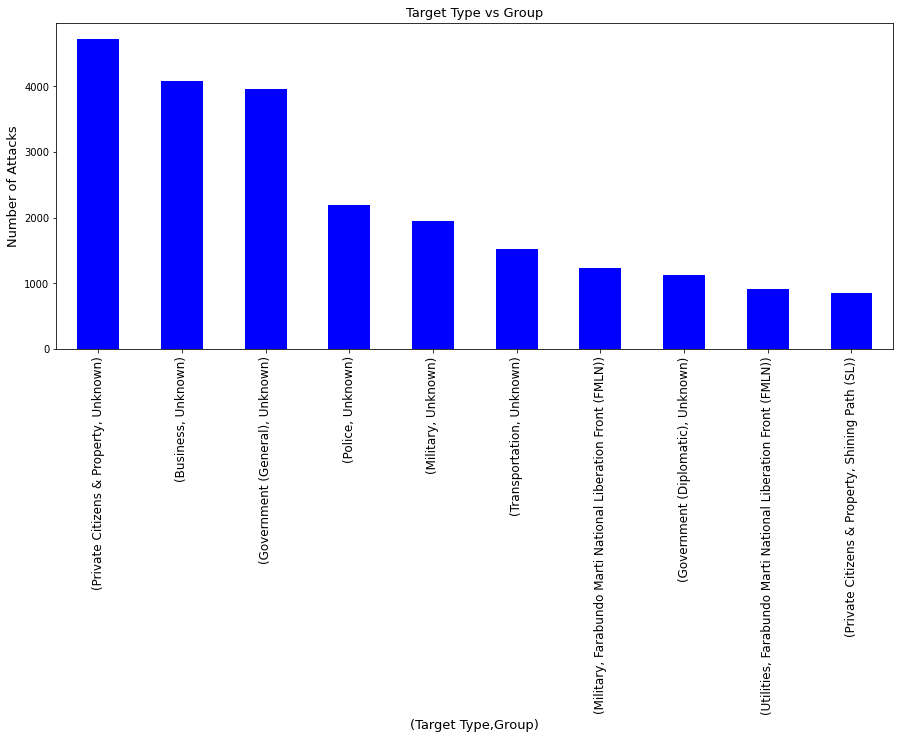

In [ ]:
tg.head(10).plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Target Type vs Group",fontsize=13)
plt.xlabel("(Target Type,Group)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
df['Casuality']=df['Wounded']+df['Killed']
terror1 = df.sort_values(by='Casuality',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='Casuality')
heat.fillna(0,inplace=True)
heat.head()

Year,1976,1978,1980,1981,1982,1983,1984,1985,1987,1989,1992,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,450.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.5,275.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
!pip install folium
import folium
from folium.plugins import MarkerCluster 
filterYear = df['Year'] == 1970

In [ ]:
df["Group Name"].value_counts()[1:15]

Shining Path (SL)                                   4501
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2656
Basque Fatherland and Freedom (ETA)                 1787
Revolutionary Armed Forces of Colombia (FARC)       1238
National Liberation Army of Colombia (ELN)          1139
Palestinians                                        1102
Kurdistan Workers' Party (PKK)                      1072
Liberation Tigers of Tamil Eelam (LTTE)             1018
New People's Army (NPA)                              975
Nicaraguan Democratic Force (FDN)                    895
Manuel Rodriguez Patriotic Front (FPMR)              830
Sikh Extremists                                      715
African National Congress (South Africa)             607
Name: Group Name, dtype: int64

In [ ]:
terror_df_group = df.dropna(subset=['Latitude','Longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group Name'])
terrorist_groups = df['Group Name'].value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group['Group Name'].isin(terrorist_groups)]
print(terror_df_group['Group Name'].unique())

['Palestinians' 'Irish Republican Army (IRA)'
 'Basque Fatherland and Freedom (ETA)'
 'National Liberation Army of Colombia (ELN)'
 'Revolutionary Armed Forces of Colombia (FARC)' 'Shining Path (SL)'
 'Farabundo Marti National Liberation Front (FMLN)']


In [ ]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['Latitude'],terror_df_group.iloc[i]['Longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group Name'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

**Inference**

